In [1]:
!pip install tensorflow

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data=keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels)=data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(train_labels[0])

9


In [0]:
class_names=['T-shirt/Top','Trousers','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneakers','Bag','Ankle Boot']

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

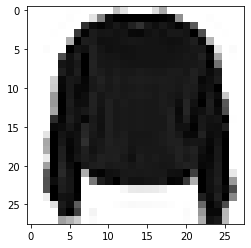

In [13]:
plt.imshow(train_images[7],cmap=plt.cm.binary)
plt.show()

In [14]:
#Data is usually stored in pixels of resolution 28*28
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

##**Create a Model**

In [0]:
#Size of image=28*28=784 --> Therefore we have 784 neurons in the input layer
#Output Layer - Number between 0-9 -->10 neurons each representing each class

In [0]:
#Hidden Layer 1 - 128 neurons - Fully connected to the input layer

In [18]:
#Define the model
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation="relu"),
  keras.layers.Dense(10,activation="softmax")                        
  ])

#Softmax - Predicts values in a layer such that all of the values add up to 1
#That is Probability of each class

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [23]:
model.fit(train_images,train_labels,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2825 - acc: 0.8950
Epoch 2/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2694 - acc: 0.8993
Epoch 3/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2592 - acc: 0.9040
Epoch 4/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2470 - acc: 0.9083
Epoch 5/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2393 - acc: 0.9103
Epoch 6/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2310 - acc: 0.9131
Epoch 7/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2244 - acc: 0.9158
Epoch 8/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2167 - acc: 0.9180
Epoch 9/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2102 - acc: 0.9216
Epoch 10/15
60000/60000 [==============================] - 

In [24]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3370 - acc: 0.8887


In [25]:
train_loss,train_acc=model.evaluate(train_images,train_labels)

60000/60000 [==============================] - 2s 31us/sample - loss: 0.1531 - acc: 0.9441


In [26]:
prediction=model.predict(test_images)
prediction

array([[9.65740377e-10, 8.10456129e-12, 2.78302648e-09, ...,
        7.86027778e-03, 2.54753246e-10, 9.92137611e-01],
       [8.87640854e-05, 5.21440421e-13, 9.99823868e-01, ...,
        8.43202108e-17, 2.51060934e-12, 6.89412523e-18],
       [1.43449641e-10, 1.00000000e+00, 1.06454274e-16, ...,
        1.85186561e-27, 3.79412762e-22, 3.03726209e-26],
       ...,
       [1.63101149e-07, 3.41861042e-17, 2.10267831e-06, ...,
        1.57092481e-11, 9.99990821e-01, 1.10154519e-20],
       [1.34341800e-12, 9.99999881e-01, 6.22007600e-14, ...,
        1.23165182e-20, 1.51236459e-13, 2.43660568e-15],
       [3.04310355e-08, 1.48815238e-10, 8.88575671e-11, ...,
        4.42284727e-05, 1.89019360e-07, 2.36728215e-09]], dtype=float32)

In [29]:
print(prediction[7])

[8.9723869e-08 1.9791927e-11 1.3586543e-04 9.0145556e-07 2.0511430e-03
 6.7740947e-12 9.9781191e-01 1.1589656e-13 9.8431416e-11 4.7916591e-11]


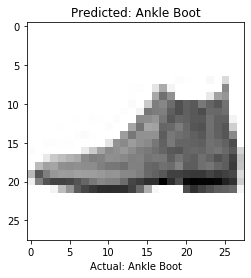

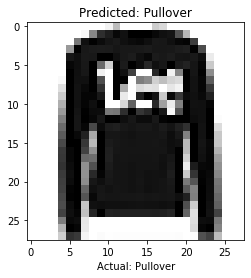

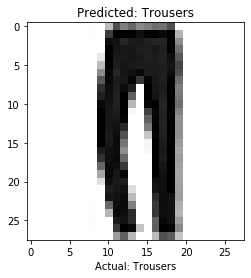

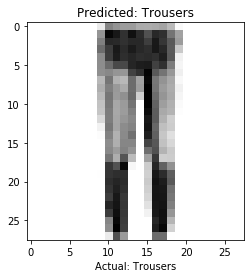

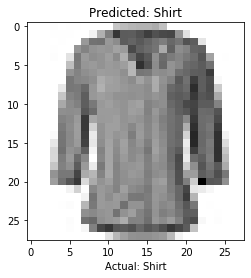

In [36]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel("Actual: "+class_names[test_labels[i]])
  plt.title("Predicted: "+class_names[np.argmax(prediction[i])])
  plt.show()